Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset path

In [2]:
dataset_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25'

Data loading and preprocessing (Modified for VGG19)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import preprocess_input # Modified import

IMG_SIZE = (224, 224)
BATCH_SIZE = 128

# Data augmentation and preprocessing (VGG19 preprocessing)
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # Using VGG19 preprocess_input
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)
# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5846 images belonging to 7 classes.
Found 647 images belonging to 7 classes.
Found 717 images belonging to 7 classes.


Dataset visualization

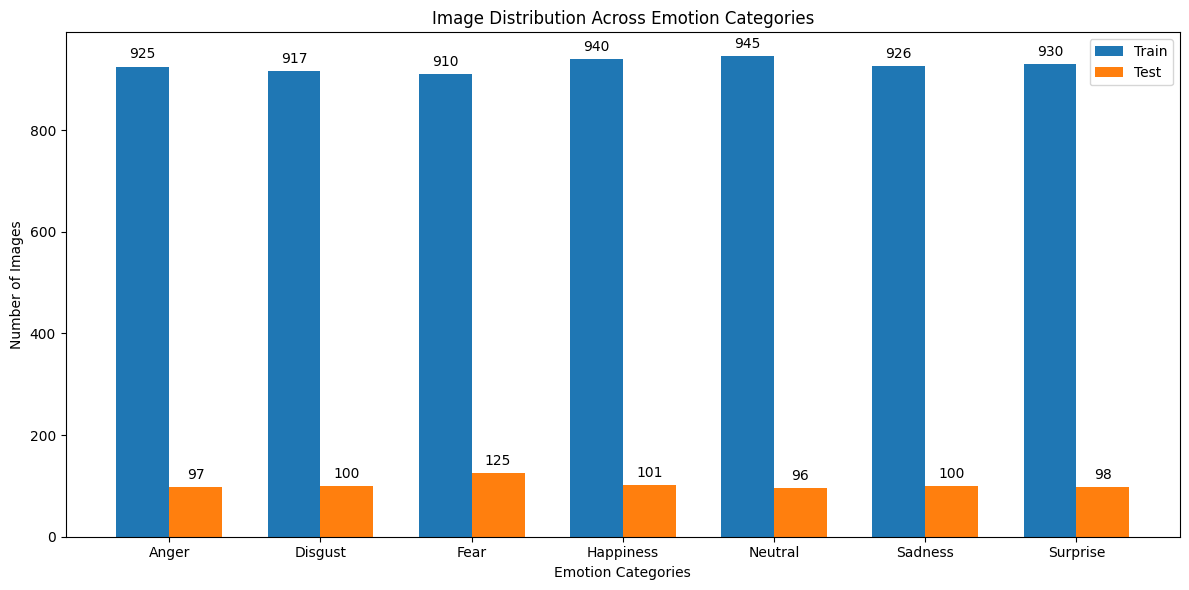

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
test_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize counts for each category
train_counts = {emotion: 0 for emotion in emotion_categories}
test_counts = {emotion: 0 for emotion in emotion_categories}

# Count images in train dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(train_data_path, emotion)
    train_counts[emotion] = len(os.listdir(emotion_path))

# Count images in test dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(test_data_path, emotion)
    test_counts[emotion] = len(os.listdir(emotion_path))

df = pd.DataFrame({
    'Emotion': emotion_categories,
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(emotion_categories))
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Emotion Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Emotion Categories')
ax.set_xticks(x)
ax.set_xticklabels(emotion_categories)
ax.legend()

# Add count labels using the provided code snippet
for index, row in df.iterrows():
    plt.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    plt.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Sample Image plotting

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)
    all_img_files = os.listdir(emotion_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(emotion_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [emotion] * len(img_paths))

Output hidden; open in https://colab.research.google.com to view.

Data Augmentation Visualization

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    brightness_range=[0.8, 1.2], # Add brightness adjustment
    shear_range=0.2,  # Apply shearing for data augmentation
    zoom_range=0.2,   # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Loop through each emotion category and plot sample images
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)

    # Randomly select an image from the directory
    img_name = random.choice(os.listdir(emotion_path))
    img_path = os.path.join(emotion_path, img_name)

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    img = img.convert('RGB')  # Ensure RGB format
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Generate augmented images
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    # Plot original and augmented images
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {emotion} Image")

    for i, aug_img in enumerate(augmented_imgs):
        aug_img = (aug_img * 255).astype('uint8')  # Rescale augmented image to 0-255
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {emotion} Image {i+1}")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Model Definition

In [7]:
from tensorflow.keras.applications import VGG19 # Modified import
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)  # Use pre-created metric
    recall = recall_metric(y_true, y_pred)       # Use pre-created metric
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained VGG19 model without the top classification layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Modified to VGG19

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Apply the output layer to the previous layer's output
output = Dense(7, activation='softmax')(x)  # 7 classes: anger, disgust, fear, happiness, neutral, sadness, and surprise

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model summary

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast (Cast)                          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,290,631 (77.40 MB)

 Trainable params: 266,247 (1.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Model Compilation and Training

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 4423s 98s/step - accuracy: 0.1543 - f1_score: 0.1193 - loss: 5.2989 - precision: 0.1542 - recall: 0.1303 - val_accuracy: 0.3578 - val_f1_score: 0.1982 - val_loss: 1.7231 - val_precision: 0.5340 - val_recall: 0.1594
Epoch 2/30
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3125 - f1_score: 0.2007 - loss: 1.9359 - precision: 0.4098 - recall: 0.1953

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.3125 - f1_score: 0.2007 - loss: 1.9359 - precision: 0.4098 - recall: 0.1953 - val_accuracy: 0.3531 - val_f1_score: 0.2037 - val_loss: 1.7123 - val_precision: 0.5926 - val_recall: 0.1750
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.3830 - f1_score: 0.2171 - loss: 1.6905 - precision: 0.5162 - recall: 0.1996 - val_accuracy: 0.4219 - val_f1_score: 0.2357 - val_loss: 1.5547 - val_precision: 0.6376 - val_recall: 0.1484
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.4609 - f1_score: 0.2367 - loss: 1.5853 - precision: 0.5510 - recall: 0.2109 - val_accuracy: 0.3812 - val_f1_score: 0.2374 - val_loss: 1.5813 - val_precision: 0.6420 - val_recall: 0.1625
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.4546 - f1_score: 0.2442 - loss: 1.4881 - precision: 0.6265 - recall: 0.2156 - val_accuracy: 0.4203 - val_f1_score: 0.2665 - val_loss: 1.5181 - val_precision: 0.6382 - val_recall: 0.1984
Epoch 

Model Evaluation

In [10]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5168 - f1_score: 0.4630 - loss: 1.3153 - precision: 0.6486 - recall: 0.3675
Test Accuracy: 52.86%


Fine-Tuning

In [11]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.6732 - f1_score: 0.4658 - loss: 0.9095 - precision: 0.7631 - recall: 0.5483 - val_accuracy: 0.6109 - val_f1_score: 0.4745 - val_loss: 1.0770 - val_precision: 0.6767 - val_recall: 0.5266
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.7734 - f1_score: 0.4752 - loss: 0.8280 - precision: 0.8283 - recall: 0.6406 - val_accuracy: 0.5797 - val_f1_score: 0.4755 - val_loss: 1.1307 - val_precision: 0.6562 - val_recall: 0.4922
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7442 - f1_score: 0.4797 - loss: 0.7347 - precision: 0.8174 - recall: 0.6585 - val_accuracy: 0.6594 - val_f1_score: 0.4910 - val_loss: 0.9304 - val_precision: 0.7257 - val_recall: 0.5828
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.8516 - f1_score: 0.4917 - loss: 0.5012 - precision: 0.8857 - recall: 0.7266 - val_accuracy: 0.6719 - val_f1_score: 0.4923 - val_loss: 0.9084 - val_precision: 0.7395 - val_recall: 0.

Fine-tuned model evaluation

In [14]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8112 - f1_score: 0.6560 - loss: 0.5309 - precision: 0.8558 - recall: 0.7876
Test Accuracy: 79.44%


Plotting Accuracy

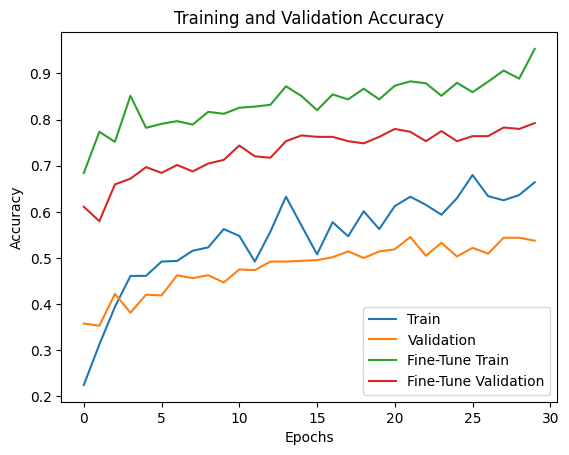

In [15]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Plotting Loss

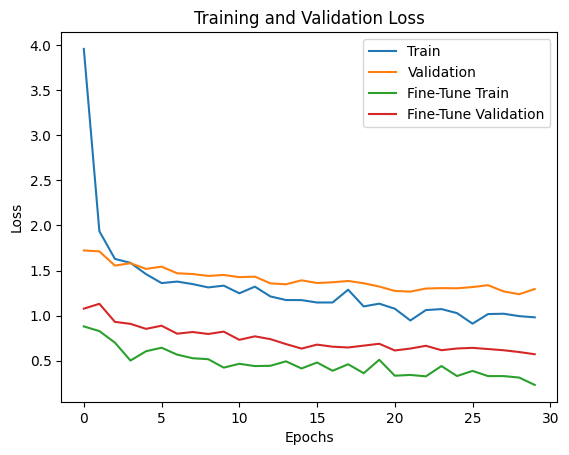

In [16]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Plotting Precision

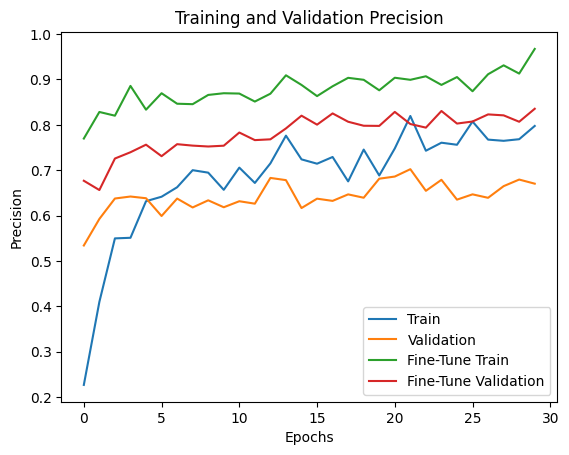

In [17]:
# Plot training & validation precision
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Validation')
plt.plot(fine_tune_history.history['precision'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_precision'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')
plt.show()

Plotting Recall

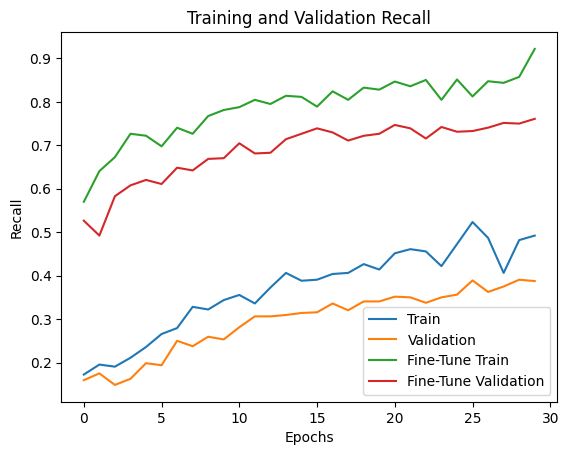

In [18]:
# Plot training & validation recall
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Validation')
plt.plot(fine_tune_history.history['recall'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_recall'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')
plt.show()

Plotting F1 Score

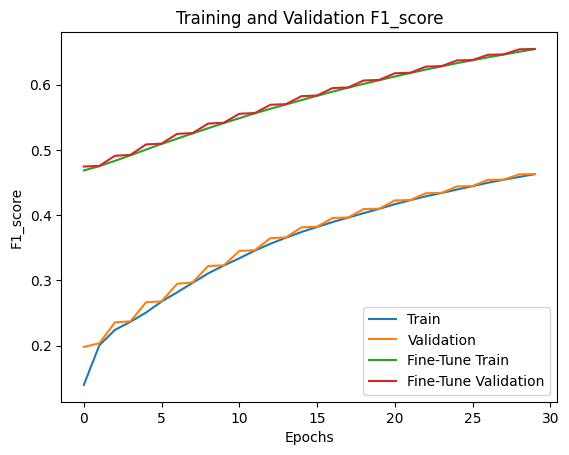

In [19]:
# Plot training & validation f1_score
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Validation')
plt.plot(fine_tune_history.history['f1_score'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_f1_score'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.legend()
plt.title('Training and Validation F1_score')
plt.show()

Checking prediction accuracy for all anger images from test data

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Define the path to the Anger folder
anger_folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test/Anger'

# Get a list of all image files in the Anger folder
image_files = [f for f in os.listdir(anger_folder_path) if os.path.isfile(os.path.join(anger_folder_path, f))]

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Loop through each image file and make a prediction
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(anger_folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make the prediction
    prediction = model.predict(img_array)

    # Get the predicted class index and emotion label
    predicted_class_index = np.argmax(prediction)
    predicted_emotion = emotion_categories[predicted_class_index]

    # Print the prediction for the current image
    print(f"Image: {image_file}, Predicted emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: anger_1001.jpg, Predicted emotion: Fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_121.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_128.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_102.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_13.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: anger_126.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_196.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: anger_167.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_182.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_190.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: anger_176.jpg, Predicted emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: anger_187.jpg, Predicte

Plotting confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

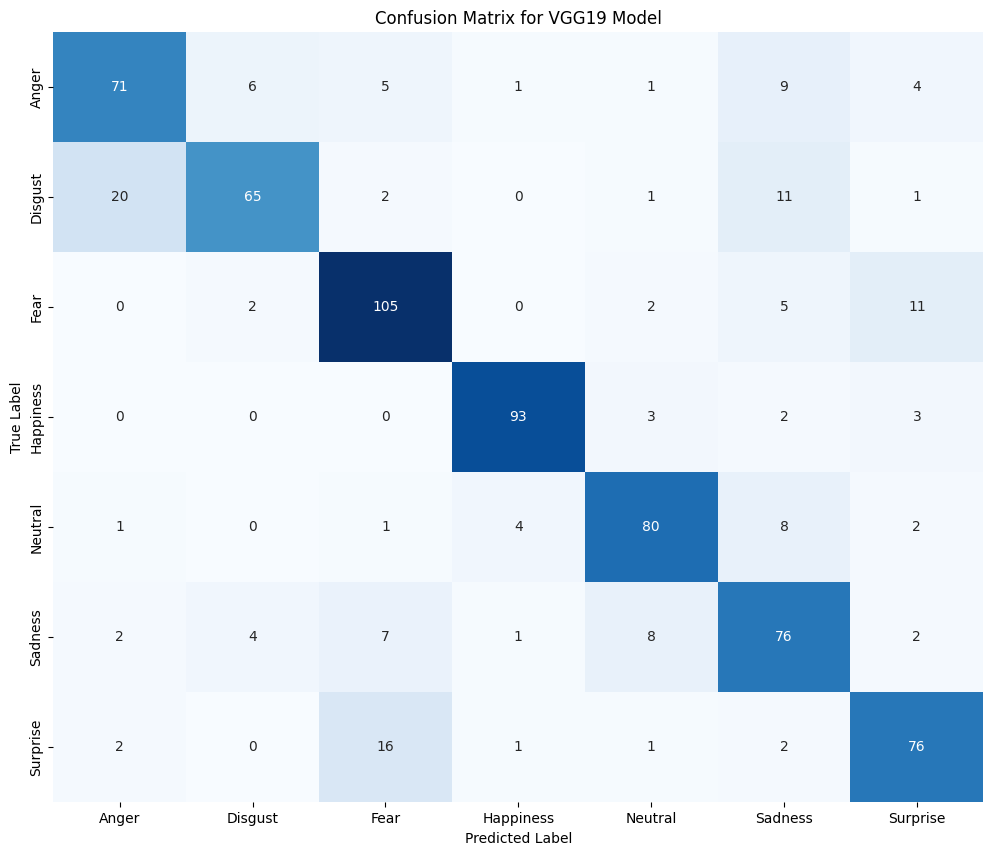

In [21]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize empty lists to store all predicted and true emotions
all_predicted_emotions = []
all_true_emotions = []

# Loop through each emotion category
for emotion in emotion_categories:
    # Define the path to the emotion folder
    emotion_folder_path = os.path.join('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test', emotion)

    # Get a list of all image files in the emotion folder
    image_files = [f for f in os.listdir(emotion_folder_path) if os.path.isfile(os.path.join(emotion_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(emotion_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and emotion label
        predicted_class_index = np.argmax(prediction)
        predicted_emotion = emotion_categories[predicted_class_index]

        # Append the predicted and true emotions to the lists
        all_predicted_emotions.append(predicted_emotion)
        all_true_emotions.append(emotion)  # True emotion is the current emotion category

# Convert the lists to NumPy arrays
all_predicted_emotions = np.array(all_predicted_emotions)
all_true_emotions = np.array(all_true_emotions)

# Create the confusion matrix
cm_all_emotions = confusion_matrix(all_true_emotions, all_predicted_emotions, labels=emotion_categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm_all_emotions, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=emotion_categories, yticklabels=emotion_categories)
plt.title("Confusion Matrix for VGG19 Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Print one vs all confusion matrix for all 7 emotions

In [22]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

true_labels = []
predicted_labels = []

# Loop through each emotion category folder in the Test folder
for emotion_index, emotion in enumerate(emotion_categories):
    emotion_folder_path = os.path.join(test_folder_path, emotion)

    # Loop through images in the emotion folder
    for image_file in os.listdir(emotion_folder_path):
        img_path = os.path.join(emotion_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)

        # Append labels
        true_labels.append(emotion_index)  # Use emotion_index for true label
        predicted_labels.append(predicted_class_index)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(emotion_categories)))

# Print TP, FP, TN, FN for each emotion
for emotion_index, emotion in enumerate(emotion_categories):
    TP = cm[emotion_index, emotion_index]
    FP = sum(cm[i, emotion_index] for i in range(len(emotion_categories)) if i != emotion_index)
    FN = sum(cm[emotion_index, i] for i in range(len(emotion_categories)) if i != emotion_index)
    TN = sum(cm[i, j] for i in range(len(emotion_categories)) for j in range(len(emotion_categories)) if i != emotion_index and j != emotion_index)

    print(f"For {emotion} Emotion:")
    print("True Positives (TP):", TP)
    print("False Positives (FP):", FP)
    print("True Negatives (TN):", TN)
    print("False Negatives (FN):", FN)
    print("-" * 20)  # Separator between emotions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

Plotting ROC curves

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

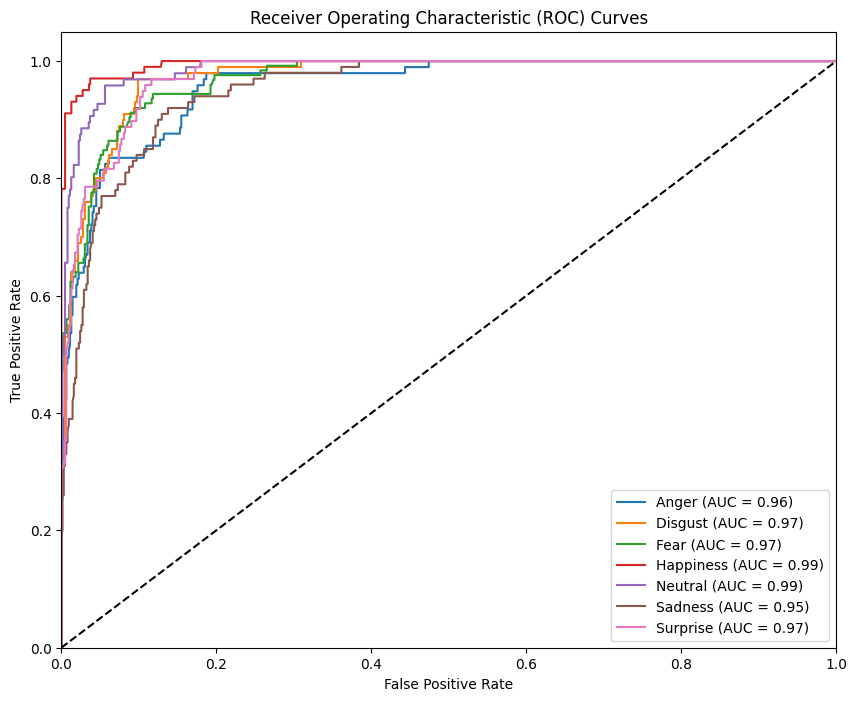

In [23]:
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Initialize lists to store true and predicted probabilities for each class
true_labels = []
predicted_probabilities = []

# Loop through each emotion category folder in the Test folder
for emotion_index, emotion in enumerate(emotion_categories):
    emotion_folder_path = os.path.join(test_folder_path, emotion)

    # Loop through images in the emotion folder
    for image_file in os.listdir(emotion_folder_path):
        img_path = os.path.join(emotion_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for all classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(emotion_categories))
        true_label[emotion_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(emotion_categories)):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{emotion_categories[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Model saving

In [24]:
model.save('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25_VGG19.h5')

Installing tensorflow modules for gradCAM visualization

In [25]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.3 MB/s eta 0:00:00


Grad-CAM Visualization for ramdom images from Test folder

In [26]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.applications.vgg19 import preprocess_input # Modified import

def grad_cam_heatmap(model, image, layer_name='block5_conv4'): # Changed penultimate layer name to 'block5_conv4' for VGG19
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x) # Use VGG19 preprocess_input

        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Grad-CAM Visualization for ramdom images from Train folder

In [27]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.applications.vgg19 import preprocess_input

def grad_cam_heatmap(model, image, layer_name='block5_conv4'): # Changed penultimate layer name to 'block5_conv4' for VGG19
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Grad-CAM Visualization on external data (A folder)


In [28]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/Football'  # Replace with your folder path

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file extensions
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Use VGG19 preprocess_input

        # Generate heatmap using GradCAM
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display the original and heatmap overlaid images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/celeb'  # Replace with your folder path

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file extensions
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Use VGG19 preprocess_input

        # Generate heatmap using GradCAM
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display the original and heatmap overlaid images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Grad-CAM++ Visualization for ramdom images from Train folder

In [30]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Modified Grad-CAM++ Visualization for ramdom images from Test folder
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Grad-CAM++ Visualization for ramdom images from Test folder

In [31]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Modified Grad-CAM++ Visualization for ramdom images from Test folder
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Grad-CAM++ Visualization on external data (A folder)


In [32]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/celeb'  # Replace with your folder path

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file extensions
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Use VGG19 preprocess_input

        # Generate heatmap using GradCAM++
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display the original and heatmap overlaid images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='block5_conv4'): # Modified for VGG19
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/mixed'  # Replace with your folder path

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file extensions
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Use VGG19 preprocess_input

        # Generate heatmap using GradCAM++
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display the original and heatmap overlaid images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.